In [1]:
import collections
from math import log
import sys
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 

In [2]:
dataset = pd.read_csv('company_climate_dataset.csv') 

In [3]:
dataset

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
0,Alphabet (Google),United States,California,150028,"1,453.76",9071847.4,2021,11365.225,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
1,Microsoft,United States,Washington,182268,"1,893.24",123704,2021,7657,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
2,Meta (Facebook),United States,California,71970,517.69,7550000,2020,3726000,2021.0,1.1,...,100,7400000000,unsure,NaN,platinum,yes,some,unsure,"lithium, gold, tantalum, tin, tungsten",no
3,Tesla,United States,Texas,70757,734.97,1954000,2021,2874904,2020.0,NaN,...,100,unsure,32877.282,2021.0,silver,yes,some,unsure,"cobalt, lithium, graphite, silicon, aluminum, ...",unsure
4,Apple,United States,California,154000,"2,223.03",22600000,2020,5850817.83,2020.0,unsure,...,100,4700000000,16556.122,2020.0,platinum,yes,yes,> 0,"cobalt, lithium, silicon, gold, silver, alumin...",some
5,Amazon,United States,Washington,"170,000","1,091.91",unsure,unsure,480000000,2020.0,1.7,...,65,unsure,272155.422,2020.0,platinum,yes,some,unsure,"cobalt, silicon, silver, aluminum, tantalum, t...",no
6,Taiwan Semiconductor Manufacturing Company,Taiwan,NaN,56831,410.00,7430000,2020,77000000,2021.0,NaN,...,7.6,44000000,unsure,NaN,platinum,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",unsure
7,Nvidia,United States,California,22473,493.71,105621,2021,359901,2019.0,NaN,...,unsure,unsure,2778,2021.0,gold,yes,no,unsure,"gold, aluminum, tin, tungsten, copper",no
8,Tencent,China,NaN,"112,771",431.30,5111000,2021,3635172.35,2020.0,1.25,...,> 0,unsure,unsure,NaN,gold,yes,no,unsure,"cobalt, lithium, graphite",no
9,Samsung,South Korea,NaN,287439,300.00,273063000,2020,142294,NaN,NaN,...,100,not sure,1181741,2020.0,gold,yes,unsure,unsure,"cobalt, silicon, gold, tantalum, tin, tungsten",yes


# GHG Emissions

We were able to find the total GHG emissions for most companies we found data for. Of the 51 companies, we couldn't find this information for the following three companies: Amazon, Palo Alto Networks, and Activision Blizzard. For Amazon, they listed some individual amounts of GHG emissions for various processes/items, but did not list any totals or GHG emissions for shipping, which is a major component of Amazon services. 

The average GHG emissions for the companies we found data for was 3002324.5515510207 metric tons of C02e. The two companies with the highest amount of GHG emissions were Apple and Samsung. The total GHG emissions for Samsung was 10 times that amount, with 29518000 metric tons of CO2e. Apple was the company with the second highest GHG emissions, with 22600000 metric tons of C02e, 7.5 times the average. On the other end, the company with the lowest total GHG emissions was Tokyo Electron Limited, with 169 metric tons of C02e. 

It's interesting to note that South Korea remains one of the most polluted countries in the world in terms of air quality. A 2017 study found that South Korea had the second worst air quality of all advanced nations of the Organization for Economic Cooperation and Development (Source: https://www.azocleantech.com/article.aspx?ArticleID=552).

In [4]:
# clean data
ghg_data = dataset[dataset['ghg_emissions_metric_tons'] != 'unsure']
ghg_data['ghg_emissions_metric_tons'] = ghg_data['ghg_emissions_metric_tons'].str.replace(',', '').astype(float)

# sort from lowest to highest GHG emissions
sorted_ghg_data = ghg_data.sort_values(by=['ghg_emissions_metric_tons'])
sorted_ghg_data

/home/nicole/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
37,Tokyo Electron Limited,Japan,NaN,12742,29.00,1.690000e+02,2021,1195,NaN,NaN,...,50,unsure,14997,2021.0,gold,unsure,unsure,unsure,"cobalt, gold, tantalum, tin, tungsten, copper",no
30,Keyence,Japan,NaN,6602,91.86,3.268000e+03,2020,unsure,NaN,unsure,...,unsure,unsure,136,2020.0,unsure,yes,unsure,unsure,"gold, tantalum, tin, tungsten",unsure
41,Fidelity Investments,United States,Massachusetts,65000,85.90,1.000000e+04,2020,unsure,NaN,1.3,...,> 0,unsure,unsure,NaN,no,no,NaN,NaN,NaN,NaN
20,Meituan,China,NaN,46662,27.77,1.078923e+04,2020,unsure,NaN,NaN,...,unsure,unsure,unsure,NaN,unsure,no,no,unsure,NaN,no
24,Intuit,United States,California,14200,100.08,2.348100e+04,2020,unsure,2020.0,unsure,...,100,unsure,460.7781803,2020.0,gold,yes,yes,unsure,"gold, tantalum, tin, tungsten",unsure
27,Servicenow,United States,California,16881,85.55,2.433800e+04,2020,unsure,2020.0,unsure,...,100,unsure,unsure,NaN,unsure,yes,yes,NaN,NaN,NaN
29,PayPal,United States,California,26500,94.13,2.440000e+04,2021,293000,NaN,1.49,...,82,unsure,unsure,NaN,certified,yes,NaN,NaN,NaN,NaN
18,AMD,United States,California,22500,156.65,2.991600e+04,2020,151000,2020.0,NaN,...,71,unsure,488,2020.0,gold,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",no
11,Broadcom,United States,California,20000,237.89,5.098800e+04,2021,2501573.435,2021.0,NaN,...,unsure,unsure,8688.108,2021.0,silver,yes,unsure,unsure,unsure,unsure
48,Atlassian,Australia,NaN,5752,23.99,7.020700e+04,2021,unsure,NaN,unsure,...,100,unsure,124,2021.0,unsure,yes,unsure,unsure,NaN,NaN


In [5]:
# get average GHG emissions
ghg_data["ghg_emissions_metric_tons"].mean()

7972630.674

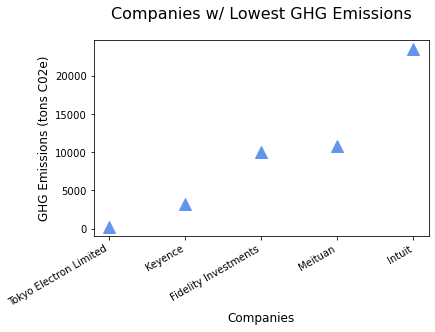

In [36]:
x = sorted_ghg_data['company'][:5]
y = sorted_ghg_data['ghg_emissions_metric_tons'][:5]
plt.plot(x,y, '^', color='cornflowerblue', markersize=12)
plt.xlabel('Companies', size=12)
plt.ylabel('GHG Emissions (tons C02e)', size=12)
plt.title("Companies w/ Lowest GHG Emissions", y=1.08, size=16)
plt.gcf().autofmt_xdate() 
plt.show()

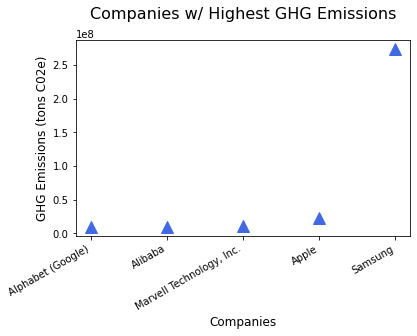

In [35]:
x = sorted_ghg_data['company'][44:49]
y = sorted_ghg_data['ghg_emissions_metric_tons'][44:49]
plt.plot(x,y, '^', color='royalblue', markersize=12)
plt.xlabel('Companies', size=12)
plt.ylabel('GHG Emissions (tons C02e)', size=12)
plt.title("Companies w/ Highest GHG Emissions", y=1.08, size=16)
plt.gcf().autofmt_xdate() 
plt.show()

### GHG Emissions by country

In [10]:
groupings['headquarters_country']
groupings.first()

,company,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,percent_waste_diverted,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
headquarters_country,,,,,,,,,,,,,,,,,,,,,
Australia,Atlassian,NaN,5752,23.99,70207.00,2021,unsure,NaN,unsure,unsure,...,100,unsure,124,2021.0,unsure,yes,unsure,unsure,NaN,NaN
China,Meituan,NaN,46662,27.77,10789.23,2020,unsure,2020.0,1.3,unsure,...,unsure,unsure,unsure,2020.0,unsure,no,no,unsure,"cobalt, lithium, graphite",no
France,Schneider Electric,NaN,166025,74.34,294051.00,2021,2072263,2020.0,NaN,NaN,...,50.6,156543450,136816,2021.0,platinum,yes,some,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",yes
Germany,SAP,NaN,107415,165.53,110000.00,2021,765000,NaN,unsure,unsure,...,100,unsure,261,2021.0,platinum,yes,unsure,NaN,NaN,NaN
Japan,Tokyo Electron Limited,NaN,12742,29.00,169.00,2021,1195,NaN,unsure,unsure,...,50,unsure,14997,2021.0,gold,unsure,unsure,unsure,"cobalt, gold, tantalum, tin, tungsten, copper",no
Netherlands,Booking.com,NaN,19400,85.39,118746.00,2021,unsure,NaN,unsure,unsure,...,100,799808,unsure,2021.0,unsure,yes,yes,unsure,"cobalt, gold, tantalum, tin, tungsten",no
South Korea,SK Hynix,NaN,22254,56.08,99765.00,2020,95714000,NaN,unsure,unsure,...,unsure,unsure,572134,2020.0,unsure,yes,unsure,unsure,"gold, tantalum, tin, tungsten",no
Taiwan,Foxconn,NaN,1290000,"5,990.00",5519742.00,2020,unsure,2021.0,NaN,unsure,...,12.45,unsure,unsure,NaN,unsure,unsure,some,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",yes
United States,Fidelity Investments,Massachusetts,65000,85.90,10000.00,2020,unsure,2020.0,1.3,90,...,> 0,unsure,unsure,2020.0,no,no,yes,unsure,"gold, tantalum, tin, tungsten",unsure


In [46]:
groupings = sorted_ghg_data.groupby(['headquarters_country'])
countries = ['Australia', 'China', 'France', 'Germany', 'Japan', 'South Korea','Netherlands', 'Taiwan', 'United States']
emissions_avg = {}
for i in countries:
    emissions_avg.update({i:groupings.get_group(i)['ghg_emissions_metric_tons'].mean()})
        
    
emissions_avg = dict(sorted(emissions_avg.items(), key=lambda item: item[1]))
emissions_avg

{'Australia': 70207.0,
 'Germany': 110000.0,
 'France': 294051.0,
 'Japan': 465435.0,
 'Netherlands': 501323.0,
 'United States': 2646588.408625,
 'China': 3396471.59,
 'Taiwan': 6474871.0,
 'South Korea': 136581382.5}

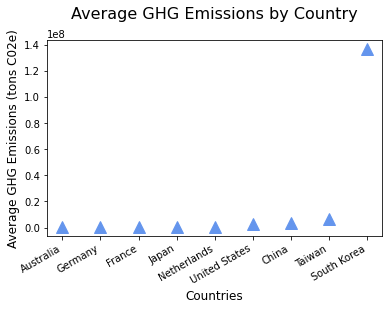

In [47]:
plt.plot(emissions_avg.keys(), emissions_avg.values(), '^', color='cornflowerblue', markersize=12)
plt.xlabel('Countries', size=12)
plt.ylabel('Average GHG Emissions (tons C02e)', size=12)
plt.title("Average GHG Emissions by Country", size=16, y=1.08)
plt.gcf().autofmt_xdate() 
plt.show()

# Renewable Energy

We were able to find % renewable energy for 38 companies out of 51. Of these 38, 14 companies had 100% renewable energy usage. There were 6 companies that had zero or almost neglible percent renewable energy including: Tencent, Adobe, Automatic Data Processing (ADP), Fiserv, Fidelity Investments, and Activision Blizzard. 

In [12]:
# clean data
dataset = dataset[dataset['percent_renewable_energy'].notna()]
re = dataset[dataset['percent_renewable_energy'] != 'unsure']

re = re[re["percent_renewable_energy"].str.contains(">") == False]
re['percent_renewable_energy'] = re['percent_renewable_energy'].str.replace(',', '').astype(float)

# sort from lowest to highest % renewable energy
sorted_re_data = re.sort_values(by=['percent_renewable_energy'])
sorted_re_data

,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
26,Automatic Data Processing (ADP),United States,New Jersey,58000,86.41,137714,2020,unsure,NaN,1.69,...,0.00,unsure,unsure,NaN,certified,yes,unsure,unsure,NaN,yes
40,Fiserv,United States,Wisconsin,44000,61.54,191405,2021,unsure,NaN,1.15,...,0.15,unsure,unsure,NaN,gold,yes,unsure,NaN,NaN,NaN
50,"Marvell Technology, Inc.",United States,Delaware,6729,46.80,11248370,2021,9190000,NaN,NaN,...,1.30,unsure,unsure,NaN,gold,unsure,no,unsure,"cobalt, lithium, silicon, gold, tantalum, tung...",no
6,Taiwan Semiconductor Manufacturing Company,Taiwan,NaN,56831,410.00,7430000,2020,77000000,2021.0,NaN,...,7.60,44000000,unsure,NaN,platinum,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",unsure
47,Palo Alto Networks,United States,California,11098,42.98,unsure,NaN,unsure,NaN,NaN,...,10.00,unsure,unsure,NaN,gold,unsure,no,NaN,NaN,NaN
51,Foxconn,Taiwan,NaN,1290000,"5,990.00",5519742,2020,unsure,NaN,NaN,...,12.45,unsure,unsure,NaN,unsure,unsure,some,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",yes
19,Texas Instruments,United States,Texas,31000,154.57,1920000,2020,18560000,NaN,NaN,...,18.14,unsure,41800,2020.0,gold,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, tant...",no
36,Lam Research,United States,California,14100,67.33,113482,2020,1327458.28,2021.0,NaN,...,30.00,unsure,8306,2020.0,unsure,unsure,some,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",no
46,Uber,United States,California,29300,45.64,3239552,2020,1013210,NaN,unsure,...,32.00,800000000,unsure,NaN,gold,yes,no,NaN,NaN,NaN
43,NetEase,China,NaN,18129,64.89,70633.03,2020,unsure,2020.0,1.3,...,37.40,unsure,6122,2020.0,unsure,unsure,unsure,NaN,NaN,NaN


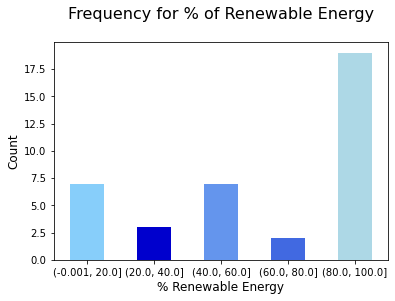

In [40]:
out = pd.cut(sorted_re_data['percent_renewable_energy'], bins=[0, 20, 40, 60, 80, 100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color=['lightskyblue', 'mediumblue', 'cornflowerblue', 'royalblue', 'lightblue'], figsize=(6,4))
ax.set_title('Frequency for % of Renewable Energy', y=1.08, size=16)
ax.set_ylabel('Count', size=12)
ax.set_xlabel('% Renewable Energy', size=12)

plt.show() 

# Water Withdrawal

We were able to find amount of water withdrawn in cubic meters for 29 companies. The average amount of water withdrawn was 29274344.87 cubic meters. The companies with the lowest water withdrawn include Tokyo Electron Limited, Cisco, Microsoft, Google, and Samsung. The companies with the highest water withdrawn include Intel, SK Hynix, and Amazon. Amazon had the highest water withdrawn with 480000000 cubic meters, about 16 times the average.

In [14]:
# clean data
dataset = dataset[dataset['water_withdrawal_cubic_meters'].notna()]
water = dataset[dataset['water_withdrawal_cubic_meters'] != 'unsure']

water['water_withdrawal_cubic_meters'] = water['water_withdrawal_cubic_meters'].str.replace(',', '').astype(float)

# sort from lowest to highest cubic meters of water withdrawal 
sorted_water_data = water.sort_values(by=['water_withdrawal_cubic_meters'])
sorted_water_data

/home/nicole/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,company,headquarters_country,usa_state,num_employees,net_worth,ghg_emissions_metric_tons,ghg_emissions_year,water_withdrawal_cubic_meters,water_withdrawal_year,avg_annual_PUE,...,percent_renewable_energy,money_in_renewables_USdollars,waste_generated_metric_tons,waste_generated_year,highest_leed_certification,ev_charging_ports,carbon_neutral_shipments,percent_product_recycled_materials,reported_raw_materials,conflict_free_supply_change
37,Tokyo Electron Limited,Japan,NaN,12742,29.00,169,2021,1.195000e+03,NaN,NaN,...,50,unsure,14997,2021.0,gold,unsure,unsure,unsure,"cobalt, gold, tantalum, tin, tungsten, copper",no
12,Cisco,United States,California,79500,173.31,174494,2021,2.902000e+03,2021.0,1.05,...,85,100000000,5863,2020.0,gold,yes,yes,unsure,"cobalt, lithium, gold, tantalum, tungsten",yes
1,Microsoft,United States,Washington,182268,"1,893.24",123704,2021,7.657000e+03,2020.0,1.125,...,100,200000000,3189,2021.0,platinum,yes,some,61,"graphite, silicon, gold, tantalum, tin, tungsten",yes
0,Alphabet (Google),United States,California,150028,"1,453.76",9071847.4,2021,1.136523e+04,2021.0,1.1,...,100,3300000000,28864,2021.0,platinum,yes,yes,100,"cobalt, tantalum, tin, tungsten",not sure
9,Samsung,South Korea,NaN,287439,300.00,273063000,2020,1.422940e+05,NaN,NaN,...,100,not sure,1181741,2020.0,gold,yes,unsure,unsure,"cobalt, silicon, gold, tantalum, tin, tungsten",yes
18,AMD,United States,California,22500,156.65,29916,2020,1.510000e+05,2020.0,NaN,...,71,unsure,488,2020.0,gold,yes,no,unsure,"cobalt, lithium, graphite, silicon, gold, silv...",no
29,PayPal,United States,California,26500,94.13,24400,2021,2.930000e+05,NaN,1.49,...,82,unsure,unsure,NaN,certified,yes,NaN,NaN,NaN,NaN
7,Nvidia,United States,California,22473,493.71,105621,2021,3.599010e+05,2019.0,NaN,...,unsure,unsure,2778,2021.0,gold,yes,no,unsure,"gold, aluminum, tin, tungsten, copper",no
22,Salesforce,United States,California,73541,158.87,1096000,2021,4.921035e+05,2021.0,1.39,...,100,unsure,unsure,NaN,certified,yes,NaN,unsure,NaN,NaN
23,SAP,Germany,NaN,107415,165.53,110000,2021,7.650000e+05,NaN,unsure,...,100,unsure,261,2021.0,platinum,yes,unsure,NaN,NaN,NaN


In [15]:
# get average water withdrawn
water["water_withdrawal_cubic_meters"].mean()

29274344.869720694

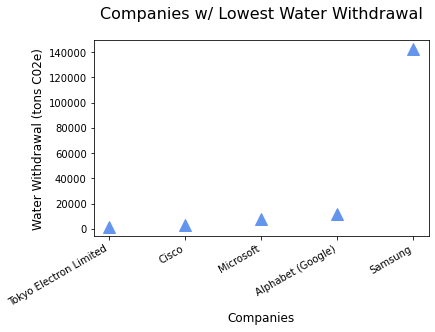

In [41]:
x = sorted_water_data['company'][:5]
y = sorted_water_data['water_withdrawal_cubic_meters'][:5]
plt.plot(x,y, '^', color='cornflowerblue', markersize=12)
plt.xlabel('Companies', size=12)
plt.ylabel('Water Withdrawal (tons C02e)', size=12)
plt.title("Companies w/ Lowest Water Withdrawal", size=16, y=1.08)
plt.gcf().autofmt_xdate() 
plt.show()

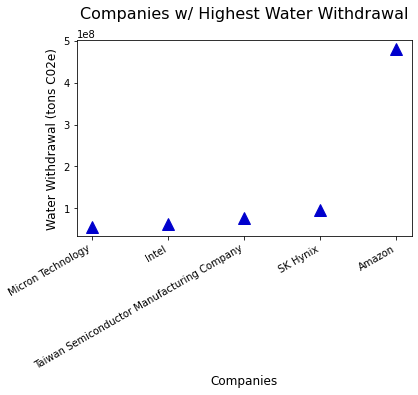

In [42]:
x = sorted_water_data['company'][-5:]
y = sorted_water_data['water_withdrawal_cubic_meters'][-5:]
plt.plot(x,y, '^', color='royalblue', markersize=12)
plt.xlabel('Companies', size=12)
plt.ylabel('Water Withdrawal (tons C02e)', size=12)
plt.title("Companies w/ Highest Water Withdrawal", size=16, y=1.08)
plt.gcf().autofmt_xdate() 
plt.show()

# LEED Certification

In [18]:
def label_function(val):
    return f'{val / 100 * len(dataset):.0f}\n{val:.0f}%'

<AxesSubplot:title={'center':'Highest LEED Certification for Companies'}>

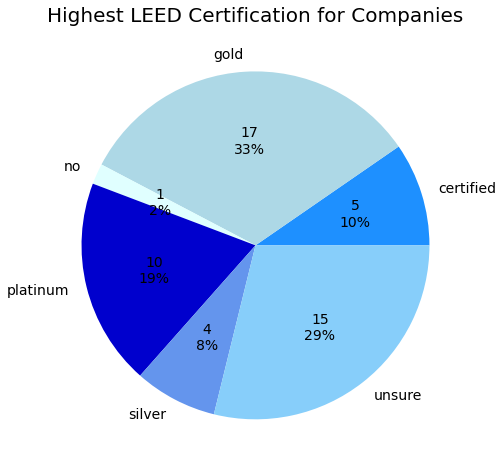

In [45]:
leed_pi = dataset.groupby('highest_leed_certification').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 14},
                                  colors=['dodgerblue', 'lightblue', 'lightcyan', 'mediumblue','cornflowerblue', 'lightskyblue'], figsize=(8,8))

leed_pi.set_title('Highest LEED Certification for Companies', size=20)
leed_pi.set_ylabel(None)
leed_pi